# Human Activity Recognition with Smartphones

Data source: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones


In [136]:
# pip install xgboost

In [138]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
# Import the csv file

file_path = 'C:/Iresha_Code/XGBoost_Classification_demo_project/Data/data.csv'
data = pd.read_csv(file_path)

# Create a pandas dataframe
df_data = pd.DataFrame(data)
df_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Explore data

In [70]:
# Check the nuber of rows and columns
df_data.shape

(10299, 563)

In [71]:
# Check total missing values
df.isnull().sum().sum()

0

In [72]:
# Check data types
df_data.dtypes.value_counts()

float64    561
int64        1
object       1
Name: count, dtype: int64

### Activity column

In [73]:
# Check data type to confirm as object
df_data['Activity'].dtype

dtype('O')

In [74]:
# Check the 'Activity' column, to confirm unique values
df_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

### Subject column

In [75]:
# Check data type to confirm as object
df_data['subject'].dtype

dtype('int64')

In [76]:
# Check the 'subject' column to confirm the number of participants
df_data['subject'].nunique()

30

From above, Activity is of 'object' data type and 'subject' is of integer. Rest of the columns - float.

# Data preparation

### Checking max, min of float columns

In [77]:
# Find the maximum value for all float columns
# Select only float columns
float_columns = df_data.select_dtypes(include=['float'])

# Find the maximum value for each float column
max_values = float_columns.max()

# Get unique maximum values
unique_max_values = max_values.unique()
unique_max_values

array([1.])

In [78]:
# Find the minimum value for all float columns
# Select only float columns
float_columns = df_data.select_dtypes(include=['float'])

# Find the maximum value for each float column
min_values = float_columns.min()

# Get unique maximum values
unique_min_values = min_values.unique()
unique_min_values

array([-1.])

### Checking the balance of label column

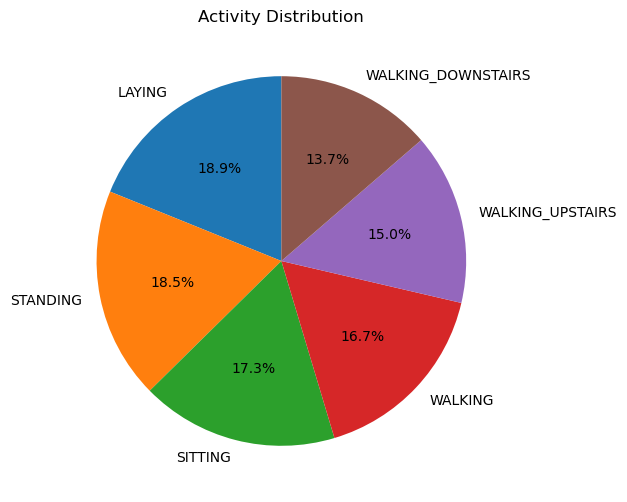

In [79]:
# Count the occurrences of each activity
activity_counts = df_data['Activity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Activity Distribution')
plt.ylabel('')  # Hide the y-label for clarity
plt.show()

Data is relatively balanced.

### Encoding 'Activity' as the label

In [80]:
# Converting the categorical 'Activity' to numerical, by Label Encoding
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Activity' column
df_data_encoded = df_data  # Renaming df
df_data_encoded['Activity_label'] = label_encoder.fit_transform(df_data_encoded['Activity'])
df_data_encoded.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,2


In [81]:
# View the mapping of labels to activities
activity_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the activity mapping
print(activity_mapping)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


In [82]:
# Drop Activity and subject columns
df_data_1 = df_data_encoded.drop(columns=['Activity', 'subject'])
df_data_1.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity_label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2


### Applying SMOTE (Synthetic Minority Over-sampling Technique) 
To balance the dataset before splitting

In [88]:
# Features and target
X = df_data_1.drop(columns=['Activity_label'])
y = df_data_1['Activity_label']

# Apply SMOTE to balance the dataset before splitting
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [89]:
X_resampled.shape

(11664, 561)

In [90]:
X_resampled.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [92]:
# Checking the changes after over-sampling
y_resampled.value_counts()

Activity_label
2    1944
1    1944
0    1944
3    1944
4    1944
5    1944
Name: count, dtype: int64

### Splitting the dataset

In [93]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (9331, 561) (9331,)
Test set: (2333, 561) (2333,)


# Data modelling

## Random Forest

In [ ]:
#  calculating error for different number of trees
from sklearn.ensemble import RandomForestClassifier
RFcla = RandomForestClassifier(oob_score=True,
                               random_state=42,
                               warm_start=True,
                               n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300]:
    RFcla.set_params(n_estimators=n_trees)
    RFcla.fit(X_train, y_train)
    oob_error = 1 - RFcla.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

c:\Users\NexteqSolutions-UAT\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\NexteqSolutions-UAT\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.039867
20.0,0.030865
30.0,0.024756
40.0,0.021327
50.0,0.019076
100.0,0.017147
150.0,0.017576
200.0,0.016718
300.0,0.017254


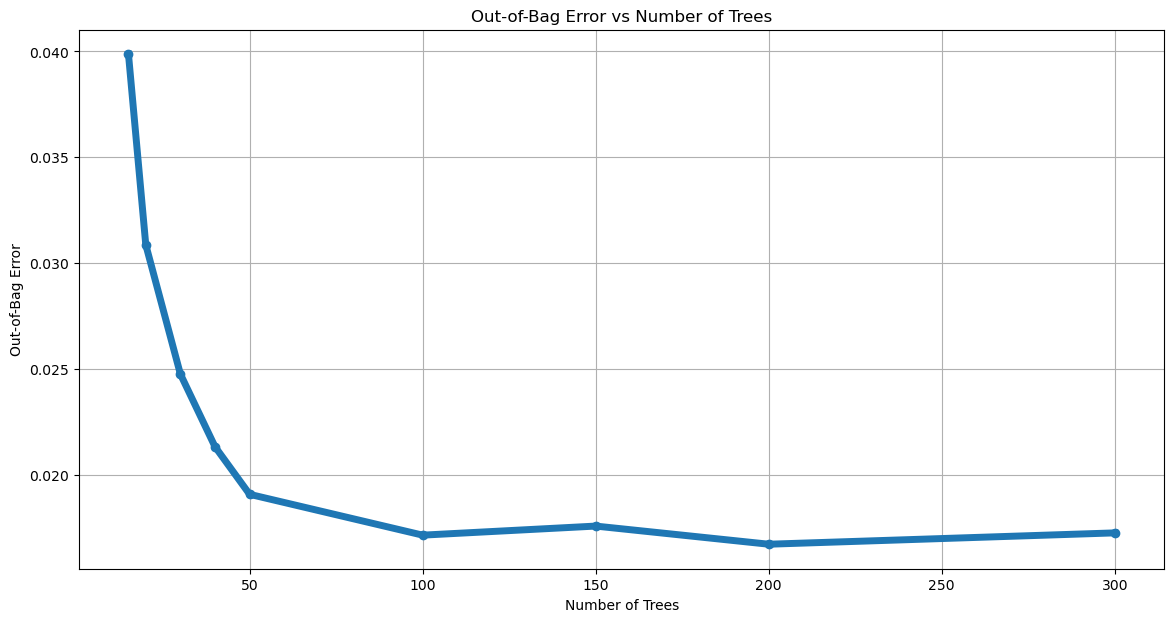

In [126]:
# Plotting the error
plt.figure(figsize=(14, 7))

# Plot the OOB errors as a line plot with markers
plt.plot(rf_oob_df.index, rf_oob_df['oob'], marker='o', linewidth=5)

# Set labels and title
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Error')
plt.title('Out-of-Bag Error vs Number of Trees')

# Show the plot
plt.grid(True)  # adds a grid to the plot for better readability
plt.show()

Observation - After 50 number of trees, there is no significant error reduction. So let's put 50 and also 100 and 200 to check.

### Tuning hyperparameters
After choosing the number of trees, we can now tune hyperparameters to see whether they reduce the error.
- max_features - default value is auto which means sqrt(n_features)
- mx_depth - default value is None. 

#### max_features 
- max_features = 'log2'

In [106]:
# List of different n_estimators values
n_estimators_list = [50, 100, 200]

# Initialize an empty list to store OOB errors
oob_errors = {}

# Loop through each n_estimators value
for n_trees in n_estimators_list:
    RFreg = RandomForestClassifier(n_estimators=n_trees, 
                                  oob_score=True,
                                  random_state=42, 
                                  n_jobs=-1, 
                                  max_features='log2')
    
    # Fit the model
    RFreg.fit(X_train, y_train)
    
    # Calculate OOB error
    oob_error = 1 - RFreg.oob_score_
    
    # Store the result in the dictionary
    oob_errors[n_trees] = oob_error

# Print the OOB errors for each n_estimators value
print(oob_errors)

{50: 0.024970528346372256, 100: 0.019504876219054723, 200: 0.017147143928839315}


- max_features = sqrt

In [115]:
# List of different n_estimators values
n_estimators_list = [50, 100, 200]

# Initialize an empty list to store OOB errors
oob_errors = {}

# Loop through each n_estimators value
for n_trees in n_estimators_list:
    RFreg = RandomForestClassifier(n_estimators=n_trees, 
                                  oob_score=True,
                                  random_state=42, 
                                  n_jobs=-1, 
                                  max_features='sqrt')
    
    # Fit the model
    RFreg.fit(X_train, y_train)
    
    # Calculate OOB error
    oob_error = 1 - RFreg.oob_score_
    
    # Store the result in the dictionary
    oob_errors[n_trees] = oob_error

# Print the OOB errors for each n_estimators value
print(oob_errors)

{50: 0.01907619762083379, 100: 0.017147143928839315, 200: 0.01671846533061838}


Observations: 
- n_estimators = 200 gives the smallest error.
- Also, default value for max_features gives the smallest error.

#### max_depth
Since n_estimators is set for 200, let's check for
- max_depth = 10, 20, None

In [109]:
# List of different max_depth values
max_depth_list = [None, 10, 20]

# Initialize an empty dictionary to store OOB errors
oob_errors_depth = {}

# Loop through each max_depth value
for depth in max_depth_list:
    RFcla = RandomForestClassifier(n_estimators=200, 
                                  oob_score=True,
                                  random_state=42, 
                                  n_jobs=-1, 
                                  max_depth=depth)
    
    # Fit the model
    RFcla.fit(X_train, y_train)
    
    # Calculate OOB error
    oob_error = 1 - RFcla.oob_score_
    
    # Store the result in the dictionary
    oob_errors_depth[depth] = oob_error

# Print the OOB errors for each max_depth value
print(oob_errors_depth)

{None: 0.01671846533061838, 10: 0.024434680098596062, 20: 0.017039974279284054}


Observations:
- max_depth = None gives the smallest error.
- Therefore, the default value is giving the least error. 

#### Model after tuning 

In [128]:
RFcla_200 = RandomForestClassifier(n_estimators=200
                                  ,oob_score=True 
                                  ,random_state=42
                                  ,n_jobs=-1)

RFcla_200.fit(X_train, y_train)
oob_error200 = 1 - RFcla_200.oob_score_
oob_error200

0.01671846533061838

In [129]:
# make predictions on test set 
label_pred_cla_rf = RFcla_200.predict(X_test)

In [130]:
# calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, label_pred_cla_rf)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9832833261894557


In [131]:
# Classificaiton report
from sklearn.metrics import classification_report

print(classification_report(y_test, label_pred_cla_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       0.98      0.97      0.97       385
           2       0.97      0.98      0.97       386
           3       1.00      0.98      0.99       395
           4       0.99      0.98      0.98       382
           5       0.97      0.99      0.98       361

    accuracy                           0.98      2333
   macro avg       0.98      0.98      0.98      2333
weighted avg       0.98      0.98      0.98      2333



What the classificaiton report means:
- precision : How many of the predicted positives were actually positive?
    - this model is highly precise, with precision ranging from 97-100% and an average of 98%.
- recall(sensitivity) : How many of the actual positives did we correctly predict?
    - Again, a high % of correct predictions, ranging from 97-100% and an average of 98%.
- f1-score : How the model is performing in terms of balancing precision and recall
    - Very good in balancing, 97-100%, average of 98%
- support : number of occurrences of each class in the dataset
    - Indicates a highly balanced dataset

## XGBoost

### Scenario 1
With a learning rate of 0.3 to make the model more robust and all others using default parameters

#### Train the model

In [ ]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective="multi:softmax",  # For multi-class classification
    num_class=6,               # Number of unique classes in your target
    n_estimators=100,          # Number of trees (default: 100)
    max_depth=6,               # Maximum depth of trees
    learning_rate=0.3,         # Step size shrinkage
    random_state=42,           # For reproducibility
)

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

#### Make predictions

In [ ]:
# Predict labels for test data
label_pred_xgb = xgb_clf.predict(X_test)

#### Evaluate the model

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, label_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, label_pred_xgb))

# Classification report
print("Classification Report:")
print(classification_report(y_test, label_pred_xgb))

Accuracy: 0.99
Confusion Matrix:
[[424   0   0   0   0   0]
 [  0 375  10   0   0   0]
 [  0   6 380   0   0   0]
 [  0   0   0 390   2   3]
 [  0   0   0   1 381   0]
 [  0   0   0   0   0 361]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       0.98      0.97      0.98       385
           2       0.97      0.98      0.98       386
           3       1.00      0.99      0.99       395
           4       0.99      1.00      1.00       382
           5       0.99      1.00      1.00       361

    accuracy                           0.99      2333
   macro avg       0.99      0.99      0.99      2333
weighted avg       0.99      0.99      0.99      2333



What the classificaiton report means:
- precision : How many of the predicted positives were actually positive?
    - this model is extremely precise, with precision ranging from 97-100% and an average of 99%.
- recall(sensitivity) : How many of the actual positives did we correctly predict?
    - Again, a high % of correct predictions, ranging from 97-100% and an average of 99%.
- f1-score : How the model is performing in terms of balancing precision and recall
    - Very good in balancing, 987-100%, with an average of 99%.
- support : number of occurrences of each class in the dataset
    - Indicates a balanced dataset

What the confusion matrix means:  
(rows represnt actual classes and columns represent predicted classes)
- Class 0 has 424 correctly predicted samples, Class 1 has 375, and so on.
- Class 1 has 10 samples misclassified as Class 2.
- Similarly, Class 3 has 2 samples misclassified as Class 4 and 3 as Class 5.
- Accuracy is given as 0.99, meaning 99% of the total predictions are correct.

### Scenario 2
With n_estimators = 200 and all others using default parameters

#### Train the model

In [ ]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective="multi:softmax",  # For multi-class classification
    num_class=6,               # Number of unique classes in your target
    n_estimators=200,          # Number of trees (default: 100)
    max_depth=6,               # Maximum depth of trees
    learning_rate=0.1,         # Step size shrinkage
    random_state=42,           # For reproducibility
)

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

#### Make predictions

In [ ]:
# Predict labels for test data
label_pred_xgb = xgb_clf.predict(X_test)

#### Evaluate the model

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, label_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, label_pred_xgb))

# Classification report
print("Classification Report:")
print(classification_report(y_test, label_pred_xgb))

Accuracy: 0.99
Confusion Matrix:
[[424   0   0   0   0   0]
 [  0 375  10   0   0   0]
 [  0   6 380   0   0   0]
 [  0   0   0 390   2   3]
 [  0   0   0   1 381   0]
 [  0   0   0   0   0 361]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       0.98      0.97      0.98       385
           2       0.97      0.98      0.98       386
           3       1.00      0.99      0.99       395
           4       0.99      1.00      1.00       382
           5       0.99      1.00      1.00       361

    accuracy                           0.99      2333
   macro avg       0.99      0.99      0.99      2333
weighted avg       0.99      0.99      0.99      2333



## Model selection

- Comapring the classification report (precision, recall, f1-score, support) and the overall accuracy, XGBoost is the better performing model when compared with Random Forest,
    - In XGBoost, 99 out of 100 predications would be accurate. 
    - Where as in Random Forest, the accurary is 98%. 
- Therefore, XGBoost model is chosen for our application of predicting human activity through smartphone sensors. 